In [1]:
import pandas as pd
import numpy as np

df_cust = pd.read_csv('./twm_customer.csv', sep =';')

display(df_cust.head())

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


## Select Columns

In [2]:
# select columns of interest 
df_cust_filtered = df_cust[["cust_id","income", "age", "years_with_bank", "nbr_children"]]
df_cust_filtered.head()

,cust_id,income,age,years_with_bank,nbr_children
0,1362691,26150,46,5,1
1,1362487,6605,71,1,0
2,1363160,18548,38,8,0
3,1362752,47668,54,3,0
4,1362548,44554,59,9,2


## Income

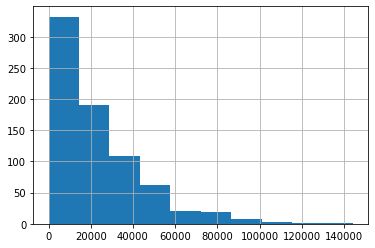

In [3]:
# raw income distribution
ax = df_cust["income"].hist()

<AxesSubplot:>

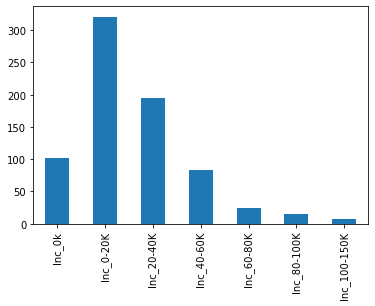

In [4]:
# binning raw data to prep for scaling
df_cust['income_group'] = pd.cut(x=df_cust['income'], 
                         bins=[-np.inf, 0, 20000, 40000, 60000, 80000, 100000, 150000],
                         labels=["Inc_0k","Inc_0-20K","Inc_20-40K","Inc_40-60K","Inc_60-80K","Inc_80-100K","Inc_100-150K"])

df_cust['income_group'].value_counts(sort=False).plot(kind='bar')

In [5]:
# # df_cust.sort_values(by='income', ascending=False).head()

# # binning raw data by groups
# df_cust['income_group'] = pd.cut(x=df_cust['income'], 
#                          bins=[-np.inf, 0, 20000, 40000, 60000, 80000, 100000, 150000, np.inf])   ##bin 0???

# df_cust['income_group'].value_counts(sort=False).plot(kind='bar')

## Age

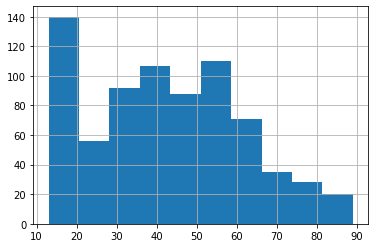

In [6]:
# raw age distribution
ax = df_cust["age"].hist()

<AxesSubplot:>

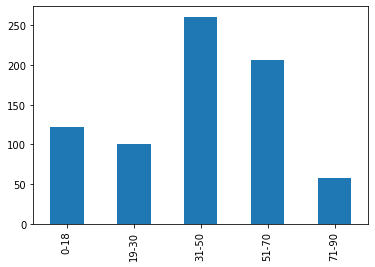

In [7]:
# binning raw data by age group

df_cust['age_group'] = pd.cut(x=df_cust['age'], bins=[0, 18, 30, 50, 70, 90], labels=['0-18', '19-30', '31-50', '51-70', '71-90'])
df_cust['age_group'].value_counts(sort=False).plot(kind='bar')

In [8]:
# # binning raw data

# df_cust['age_group'] = pd.cut(x=df_cust['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89], labels=['10s','20s', '30s', '40s', '50s', '60s', '70s', '80s'])
# df_cust['age_group'].value_counts(sort=False).plot(kind='bar')

## Years with Bank

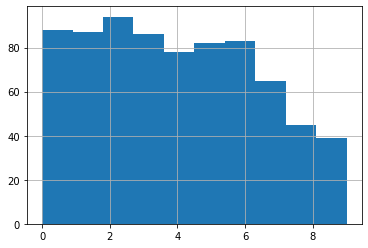

In [9]:
# raw years with bank distribution
ax = df_cust["years_with_bank"].hist()

<AxesSubplot:>

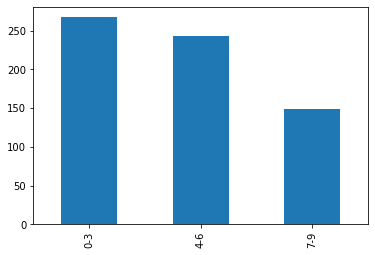

In [10]:
# binning raw data

df_cust['years_banked'] = pd.cut(x=df_cust['years_with_bank'], bins=[0,3,6,9], labels=['0-3','4-6','7-9'])
df_cust['years_banked'].value_counts(sort=False).plot(kind='bar')

## Number of Children

In [11]:
df_cust.sort_values(by='nbr_children', ascending=False).head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,income_group,age_group,years_banked
498,1362888,56266,44,4,5,M,3,,Frank ...,Kirchmer ...,3204,Kingsbury ...,97248,Portland,OR,Inc_40-60K,31-50,4-6
8,1363486,39942,41,1,5,F,4,,Jill ...,Campbell ...,3830,Tenth ...,96802,Honolulu,HI,Inc_20-40K,31-50,0-3
270,1362492,40252,40,0,5,F,3,,Maggie ...,McMillen ...,2968,Leek ...,77058,Houston,TX,Inc_40-60K,31-50,NaN
331,1363060,48479,46,6,5,M,2,,Donald ...,Gold ...,7879,Third ...,14622,Rochester,NY,Inc_40-60K,31-50,4-6
123,1362664,30676,46,4,5,M,4,Mr.,Corey ...,Boyd ...,16437,37th ...,90750,Long Beach,CA,Inc_20-40K,31-50,4-6


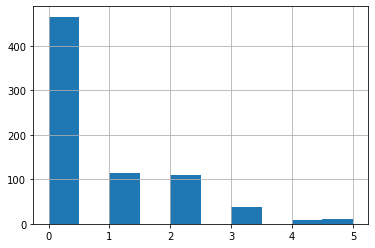

In [12]:
# raw number of children distribution
ax = df_cust["nbr_children"].hist()

<AxesSubplot:>

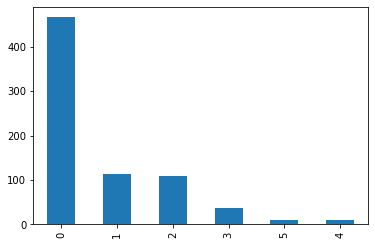

In [13]:
# binning not necessary, ranges only from 0 to 5 number of children

df_cust["nbr_children"].value_counts(sort=True).plot(kind='bar')

## Standardize Scaling 
* income, years_with_bank, nbr_children (minmaxscaled)
* age (binning, dummy variables)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cust_select = df_cust[["income", "years_with_bank", "nbr_children"]]
cust_scaled_data = scaler.fit_transform(df_cust_select)

# df_cust_rescaled['normalized_income'] = scaler.fit_transform(df_cust_filtered['normalized_income'])
df_cust_scaled = pd.DataFrame(cust_scaled_data, columns=df_cust_select.columns)
df_cust_scaled

,income,years_with_bank,nbr_children
0,0.181399,0.555556,0.2
1,0.045818,0.111111,0.0
2,0.128665,0.888889,0.0
3,0.330667,0.333333,0.0
4,0.309066,1.000000,0.4
...,...,...,...
742,0.102631,0.666667,0.2
743,0.183043,0.666667,0.2
744,0.425231,0.000000,0.4
745,0.104747,0.777778,0.0


In [15]:
# # importing one hot encoder 
# from sklearn.preprocessing import OneHotEncoder

# # creating one hot encoder object 
# onehotencoder = OneHotEncoder()  # create one hot encoder  # if we want, we can turn this into dummy encoding with drop="first"
# onehotencoder.fit_transform(df_cust[['age_group']]).todense()  # from binning age_group  # todense returns a dense matrix

# df_onehoten = pd.DataFrame(onehotencoder.fit_transform(df_cust[["age_group"]]).todense())
# print(df_onehoten)

In [16]:
df_age_dum = pd.get_dummies(df_cust['age_group'])
df_age_dum

,0-18,19-30,31-50,51-70,71-90
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
742,0,0,1,0,0
743,0,0,0,1,0
744,0,0,1,0,0
745,0,0,1,0,0


In [17]:
# df_income_dum = pd.get_dummies(df_cust['income_group'])
# df_income_dum

In [18]:
# final DF for Numeric analysis -- combine one hot encoding transformed columns with minmaxscale

df_cust_num = pd.concat([df_cust['cust_id'], df_cust_scaled, df_age_dum], axis=1)
df_cust_num

,cust_id,income,years_with_bank,nbr_children,0-18,19-30,31-50,51-70,71-90
0,1362691,0.181399,0.555556,0.2,0,0,1,0,0
1,1362487,0.045818,0.111111,0.0,0,0,0,0,1
2,1363160,0.128665,0.888889,0.0,0,0,1,0,0
3,1362752,0.330667,0.333333,0.0,0,0,0,1,0
4,1362548,0.309066,1.000000,0.4,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
742,1363324,0.102631,0.666667,0.2,0,0,1,0,0
743,1362895,0.183043,0.666667,0.2,0,0,0,1,0
744,1362569,0.425231,0.000000,0.4,0,0,1,0,0
745,1363364,0.104747,0.777778,0.0,0,0,1,0,0


In [19]:
# export to csv

df_cust_num.to_csv('Numerical_Analysis_Customer.csv',index=False)

In [20]:
# from sklearn.preprocessing import StandardScaler

# # standardize scaling for income, age, years_with_bank, nbr_children

# std_scaler = StandardScaler()

# scaled_data = std_scaler.fit_transform(df_cust_filtered)

# # df_cust_scaled = pd.DataFrame(scaled_data, columns=['])

# df_cust_scaled = pd.DataFrame(scaled_data, columns=df_cust_filtered.columns)
# df_cust_scaled

In [21]:
# df_cust_scaled["income"].value_counts(sort=True).plot(kind='bar')

# df_cust_scaled["income"].plot(figsize=(20,10), linewidth=2, fontsize = 20)

### scale all numerical features -- just to see the difference


## MINMAX SCALE

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_cust_select = df_cust[["income", "age", "years_with_bank", "nbr_children"]]
cust_scaled_data = scaler.fit_transform(df_cust_select)

# df_cust_rescaled['normalized_income'] = scaler.fit_transform(df_cust_filtered['normalized_income'])
df_cust_scaled = pd.DataFrame(cust_scaled_data, columns=df_cust_select.columns)
df_cust_scaled

,income,age,years_with_bank,nbr_children
0,0.181399,0.434211,0.555556,0.2
1,0.045818,0.763158,0.111111,0.0
2,0.128665,0.328947,0.888889,0.0
3,0.330667,0.539474,0.333333,0.0
4,0.309066,0.605263,1.000000,0.4
...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2
743,0.183043,0.565789,0.666667,0.2
744,0.425231,0.486842,0.000000,0.4
745,0.104747,0.315789,0.777778,0.0


## STANDARD SCALE 

In [23]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_cust_select = df_cust[["income", "age", "years_with_bank", "nbr_children"]]
cust_std_scaled_data = std_scaler.fit_transform(df_cust_select)

# df_cust_rescaled['normalized_income'] = scaler.fit_transform(df_cust_filtered['normalized_income'])
df_cust_std_scaled = pd.DataFrame(cust_std_scaled_data, columns=df_cust_select.columns)
df_cust_std_scaled

,income,age,years_with_bank,nbr_children
0,0.154185,0.184312,0.408539,0.258591
1,-0.726524,1.493070,-1.087435,-0.648298
2,-0.188366,-0.234490,1.530520,-0.648298
3,1.123798,0.603115,-0.339448,-0.648298
4,0.983479,0.864867,1.904514,1.165479
...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591
743,0.164864,0.707816,0.782533,0.258591
744,1.738064,0.393714,-1.461429,1.165479
745,-0.343735,-0.286841,1.156526,-0.648298


In [24]:
# create another table (updated where age is not binned)

df_cust_num_std_scaled = pd.concat([df_cust['cust_id'], df_cust_std_scaled], axis=1)
df_cust_num_std_scaled

,cust_id,income,age,years_with_bank,nbr_children
0,1362691,0.154185,0.184312,0.408539,0.258591
1,1362487,-0.726524,1.493070,-1.087435,-0.648298
2,1363160,-0.188366,-0.234490,1.530520,-0.648298
3,1362752,1.123798,0.603115,-0.339448,-0.648298
4,1362548,0.983479,0.864867,1.904514,1.165479
...,...,...,...,...,...
742,1363324,-0.357478,-0.339191,0.782533,0.258591
743,1362895,0.164864,0.707816,0.782533,0.258591
744,1362569,1.738064,0.393714,-1.461429,1.165479
745,1363364,-0.343735,-0.286841,1.156526,-0.648298


In [25]:
# export updated table where age is not binned -- to csv

df_cust_num_std_scaled.to_csv('Numerical_Analysis_Customer_STD_SCALED.csv',index=False)

In [26]:
df_cust_select = pd.concat([df_cust['cust_id'], df_cust_select], axis=1)
df_cust_select.to_csv('Numerical_Analysis_Customer_Non_Scaled.csv',index=False)

In [27]:
df_cust_select.head()

,cust_id,income,age,years_with_bank,nbr_children
0,1362691,26150,46,5,1
1,1362487,6605,71,1,0
2,1363160,18548,38,8,0
3,1362752,47668,54,3,0
4,1362548,44554,59,9,2
